In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import data
GTO_selligent = pd.read_csv('/Users/mathijsvanboesschoten/Documents/Efteling/GTO_selligent.csv', index_col=0)  

### K-means clustering

Clean data by ensuring children are maximum 18 and at least 18 year younger than their parents

In [2]:
#Difference age child and respondent larger than 18
GTO_selligent['AGE_kind1'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind1'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind2'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind2'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind3'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind3'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind4'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind4'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind5'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind5'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind6'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind6'] <= 16, np.nan, GTO_selligent['AGE_kind1'])

#Only children below 19 years old are marked as child
GTO_selligent['AGE_kind1'] = np.where(GTO_selligent['AGE_kind1'] >= 18, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind2'] = np.where(GTO_selligent['AGE_kind2'] >= 18, np.nan, GTO_selligent['AGE_kind2'])
GTO_selligent['AGE_kind3'] = np.where(GTO_selligent['AGE_kind3'] >= 18, np.nan, GTO_selligent['AGE_kind3'])
GTO_selligent['AGE_kind4'] = np.where(GTO_selligent['AGE_kind4'] >= 18, np.nan, GTO_selligent['AGE_kind4'])
GTO_selligent['AGE_kind5'] = np.where(GTO_selligent['AGE_kind5'] >= 18, np.nan, GTO_selligent['AGE_kind5'])
GTO_selligent['AGE_kind6'] = np.where(GTO_selligent['AGE_kind6'] >= 18, np.nan, GTO_selligent['AGE_kind6'])

In [3]:
from sklearn.cluster import KMeans

# Maak k-means voor elke k value en vergelijk de som van de squared distances
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(GTO_selligent[['AGE_respondent','gem_leeftijd_kids']])
    Sum_of_squared_distances.append(km.inertia_)

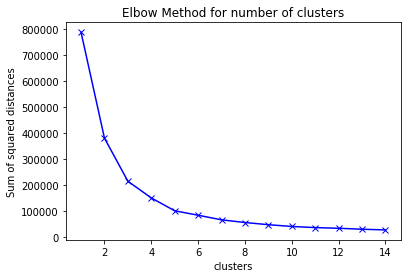

In [4]:
#Show the optimal number of clusters --> The elbow seems te be around 5 clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for number of clusters')
plt.show()

In [5]:
#create clusters
clu = KMeans(n_clusters=5,random_state=0)
clu.fit(GTO_selligent[['AGE_respondent','gem_leeftijd_kids']])
GTO_selligent['cluster'] = clu.labels_
GTO_selligent.groupby('cluster').mean().T

cluster,0,1,2,3,4
AGE_respondent,63.998008,34.962733,44.157350,47.011264,21.981402
AGE_kind1,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind2,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind3,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind4,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind5,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind6,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind7,NaN,NaN,NaN,NaN,NaN
AGE_kind8,NaN,NaN,NaN,NaN,NaN
cijfer bezoek,8.754980,8.648292,8.662526,8.604506,8.683834


Text(27.04211588541667, 0.5, 'Age respondents')

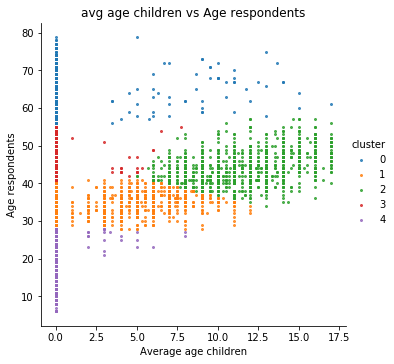

In [6]:
import seaborn as sns

#Scatter plot of Wattage and Duration
sns.lmplot('gem_leeftijd_kids','AGE_respondent', 
           data=GTO_selligent, 
           fit_reg=False, 
           hue="cluster",  
           scatter_kws={"marker": "D", 
                        "s": 4})
plt.title('avg age children vs Age respondents')
plt.xlabel('Average age children')
plt.ylabel('Age respondents')

In [7]:
#Zorgen dat verschil in leeftijd tussen kind en respondent groter is dan 18
GTO_selligent['AGE_kind1'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind1'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind2'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind2'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind3'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind3'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind4'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind4'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind5'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind5'] <= 16, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind6'] = np.where(GTO_selligent['AGE_respondent'] - GTO_selligent['AGE_kind6'] <= 16, np.nan, GTO_selligent['AGE_kind1'])

#Zorgen dat alleen kinderen onder de 18 meegenomen worden als kinderen
GTO_selligent['AGE_kind1'] = np.where(GTO_selligent['AGE_kind1'] >= 18, np.nan, GTO_selligent['AGE_kind1'])
GTO_selligent['AGE_kind2'] = np.where(GTO_selligent['AGE_kind2'] >= 18, np.nan, GTO_selligent['AGE_kind2'])
GTO_selligent['AGE_kind3'] = np.where(GTO_selligent['AGE_kind3'] >= 18, np.nan, GTO_selligent['AGE_kind3'])
GTO_selligent['AGE_kind4'] = np.where(GTO_selligent['AGE_kind4'] >= 18, np.nan, GTO_selligent['AGE_kind4'])
GTO_selligent['AGE_kind5'] = np.where(GTO_selligent['AGE_kind5'] >= 18, np.nan, GTO_selligent['AGE_kind5'])
GTO_selligent['AGE_kind6'] = np.where(GTO_selligent['AGE_kind6'] >= 18, np.nan, GTO_selligent['AGE_kind6'])


In [8]:
#show the average age of the children without the empty values of visitors without children
GTO_selligent['gem_leeftijd_kids'] = GTO_selligent['gem_leeftijd_kids'].replace(0, np.nan)
GTO_selligent.groupby('cluster').mean().T

cluster,0,1,2,3,4
AGE_respondent,63.998008,34.962733,44.157350,47.011264,21.981402
AGE_kind1,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind2,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind3,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind4,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind5,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind6,10.155556,6.502609,12.001105,4.750000,3.772727
AGE_kind7,NaN,NaN,NaN,NaN,NaN
AGE_kind8,NaN,NaN,NaN,NaN,NaN
cijfer bezoek,8.754980,8.648292,8.662526,8.604506,8.683834
